## **Курсовая по HealthTech и хемоинформатике**  Часть 1 EDA

* **Чистка данных**
* **Заполнение NaN по правилам**
* **3 модели регрессии:** IC50, CC50, SI
* **Классификации** (медиана, порог > 8)
* **Метрики:** R², MAE, F1
* **Таблицы с результатами**
* Графики: barplot/heatmap


В дальнейших планах

### ***ML Модели***
RandomForestRegressor, XGBoost, CatBoost etc.
* **Для классификации:** LogisticRegression, RandomForestClassifier, XGBoostClassifier, CatBoostClassifier etc.
* **Гиперпараметры** — через GridSearchCV

### **Метрики:**
* Регрессия: MAE, RMSE, R²
* Классификация: Accuracy, Precision, Recall, F1, ROC-AUC



In [ ]:
!pip install openpyxl

In [ ]:
# Основные библиотеки
import numpy as np
import pandas as pd

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# Предобработка и моделирование
from sklearn.impute import SimpleImputer  # SimpleImputer позволяет заменить пропуски, например, на среднее значение по столбцу.
from sklearn.preprocessing import StandardScaler  # Импорт класса для масштабирования признаков.
# StandardScaler приводит все числовые признаки к одному масштабу (со средним 0 и стандартным отклонением 1),
# что важно для многих алгоритмов машинного обучения.

# Статистика
from scipy.stats import f_oneway

# Настройки графиков
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")
%matplotlib inline

In [ ]:

# === Загружаем даные ===
df = pd.read_excel("/content/sample_data/1.xlsx")
df = df.drop_duplicates()
print(f"Размерность набора данных: {df.shape}")
display(df.head())
df.info()



Размерность набора данных: (1001, 214)


,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


In [ ]:
import pandas as pd

#
feature_list = df.columns.tolist()

# Выведем список всех признаков
print("Всего признаков:", len(feature_list))
print("Список признаков:")
for feature in feature_list:
    print("-", feature)

Всего признаков: 214
Список признаков:
- Unnamed: 0
- IC50, mM
- CC50, mM
- SI
- MaxAbsEStateIndex
- MaxEStateIndex
- MinAbsEStateIndex
- MinEStateIndex
- qed
- SPS
- MolWt
- HeavyAtomMolWt
- ExactMolWt
- NumValenceElectrons
- NumRadicalElectrons
- MaxPartialCharge
- MinPartialCharge
- MaxAbsPartialCharge
- MinAbsPartialCharge
- FpDensityMorgan1
- FpDensityMorgan2
- FpDensityMorgan3
- BCUT2D_MWHI
- BCUT2D_MWLOW
- BCUT2D_CHGHI
- BCUT2D_CHGLO
- BCUT2D_LOGPHI
- BCUT2D_LOGPLOW
- BCUT2D_MRHI
- BCUT2D_MRLOW
- AvgIpc
- BalabanJ
- BertzCT
- Chi0
- Chi0n
- Chi0v
- Chi1
- Chi1n
- Chi1v
- Chi2n
- Chi2v
- Chi3n
- Chi3v
- Chi4n
- Chi4v
- HallKierAlpha
- Ipc
- Kappa1
- Kappa2
- Kappa3
- LabuteASA
- PEOE_VSA1
- PEOE_VSA10
- PEOE_VSA11
- PEOE_VSA12
- PEOE_VSA13
- PEOE_VSA14
- PEOE_VSA2
- PEOE_VSA3
- PEOE_VSA4
- PEOE_VSA5
- PEOE_VSA6
- PEOE_VSA7
- PEOE_VSA8
- PEOE_VSA9
- SMR_VSA1
- SMR_VSA10
- SMR_VSA2
- SMR_VSA3
- SMR_VSA4
- SMR_VSA5
- SMR_VSA6
- SMR_VSA7
- SMR_VSA8
- SMR_VSA9
- SlogP_VSA1
- SlogP_VSA

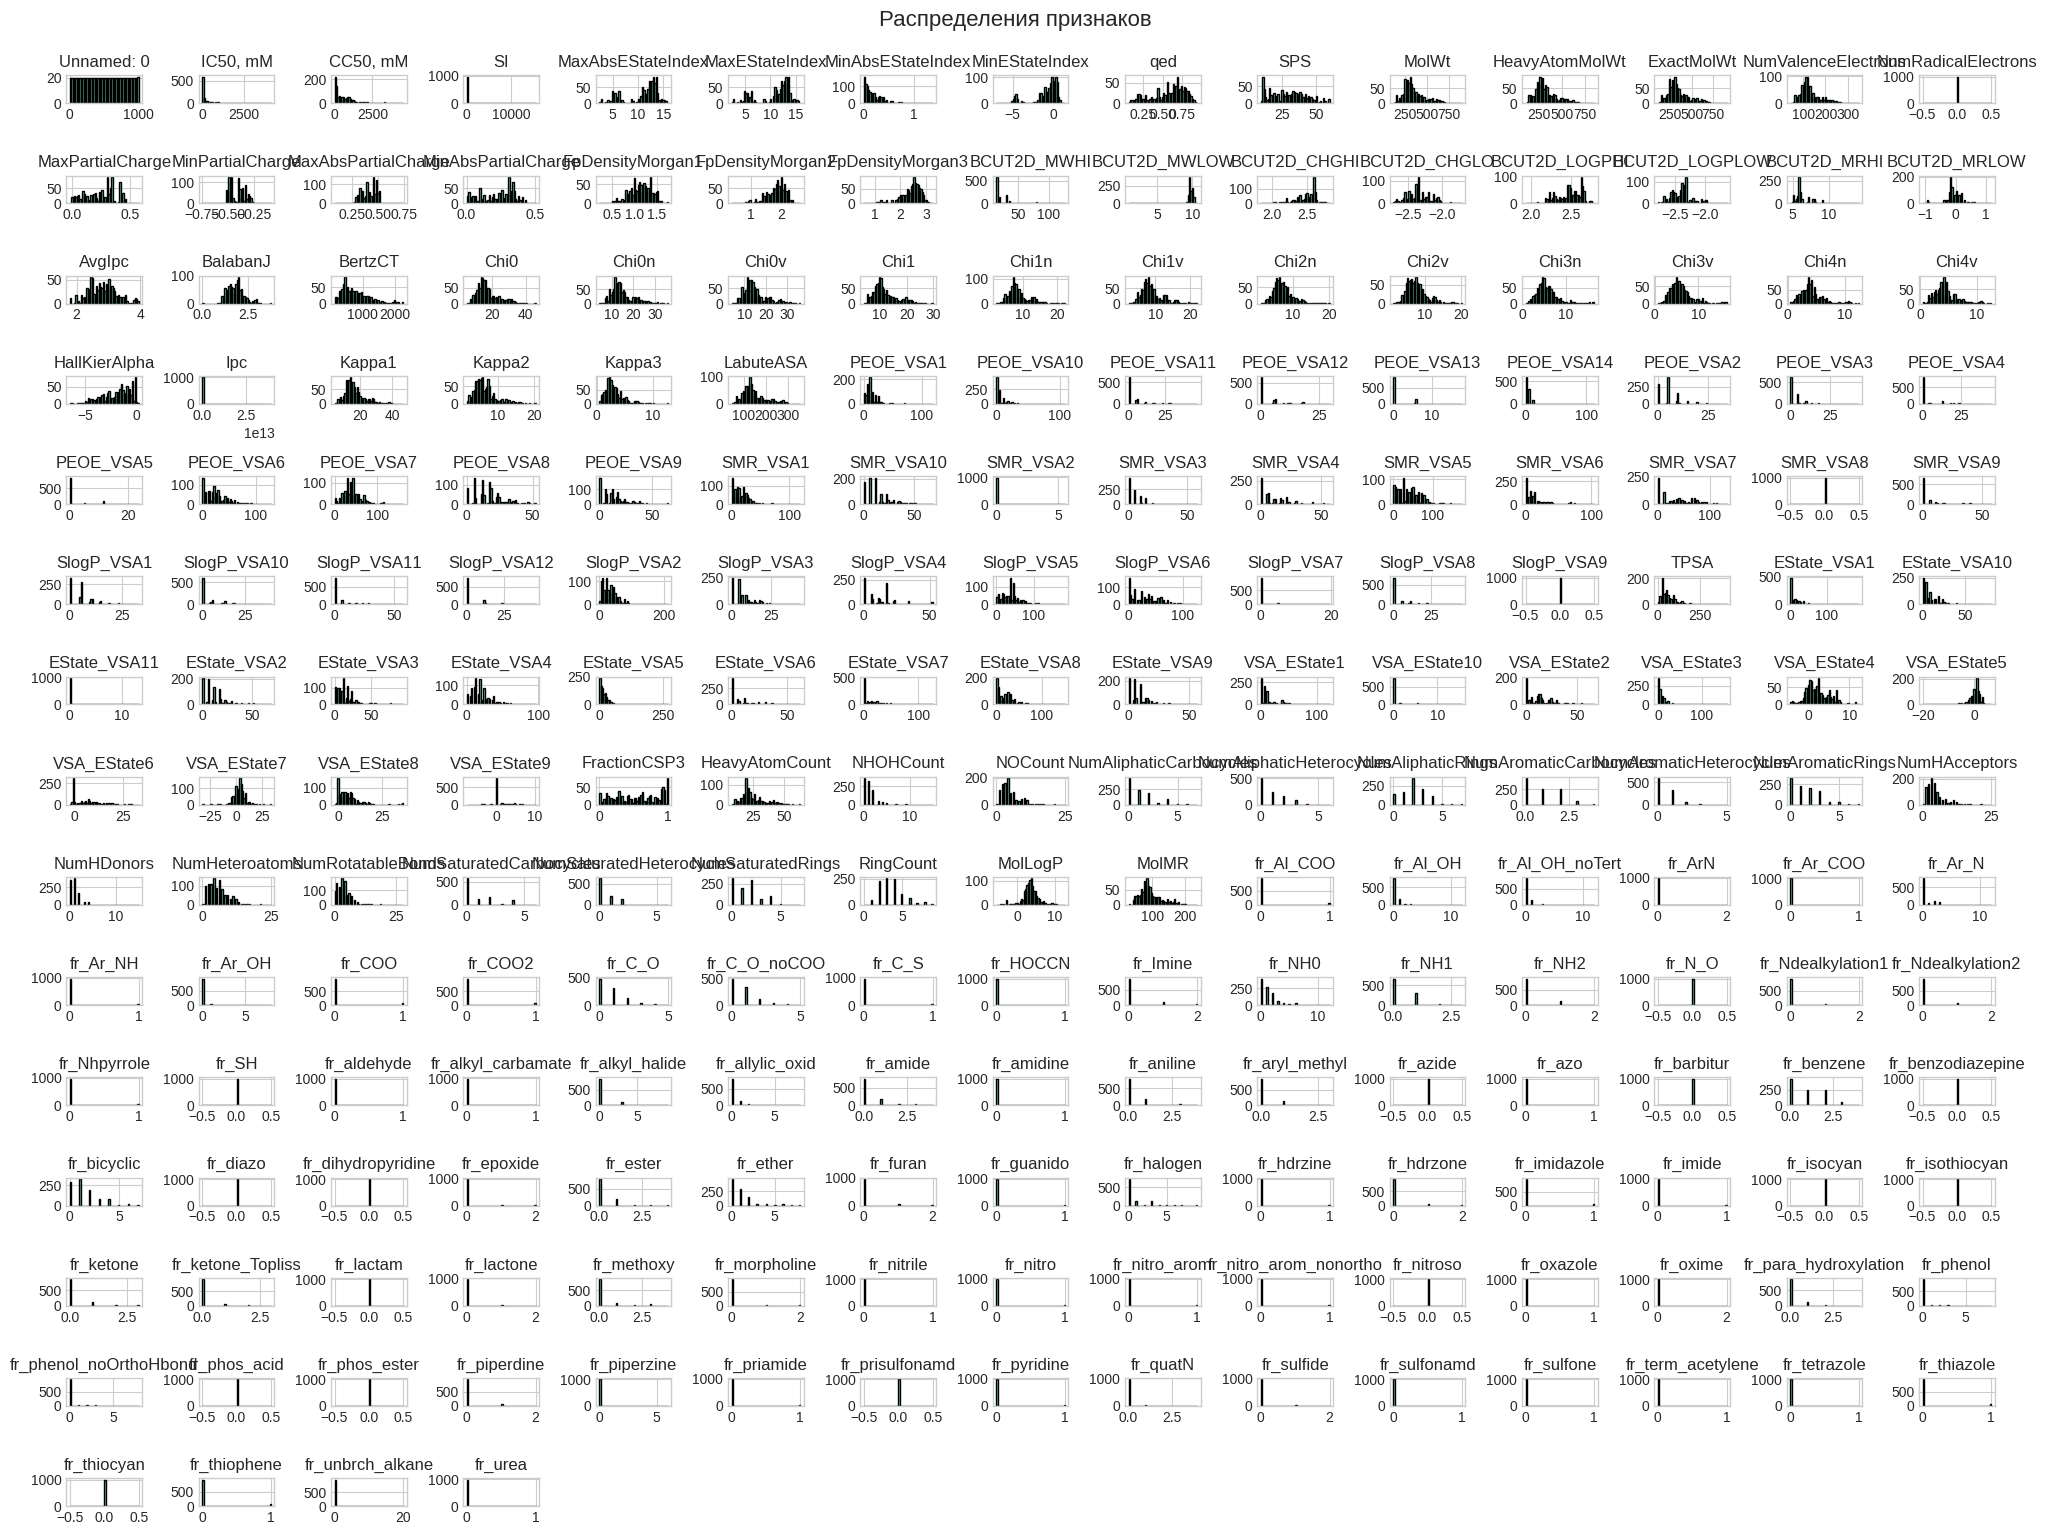

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20, 15), edgecolor='black')
plt.tight_layout()
plt.suptitle("Распределения признаков", fontsize=16, y=1.02)
plt.show()

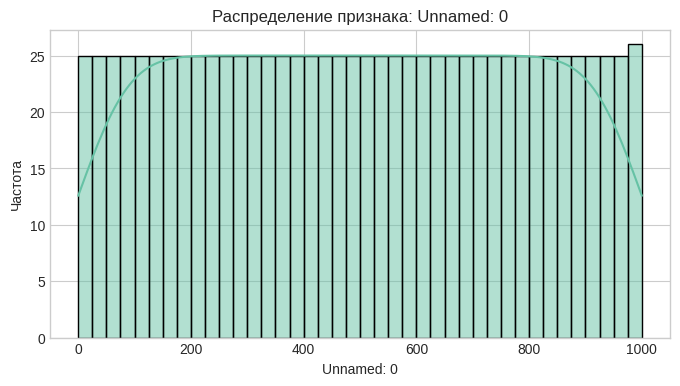

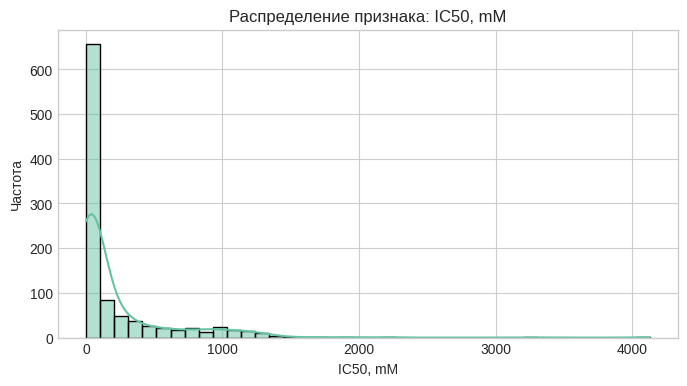

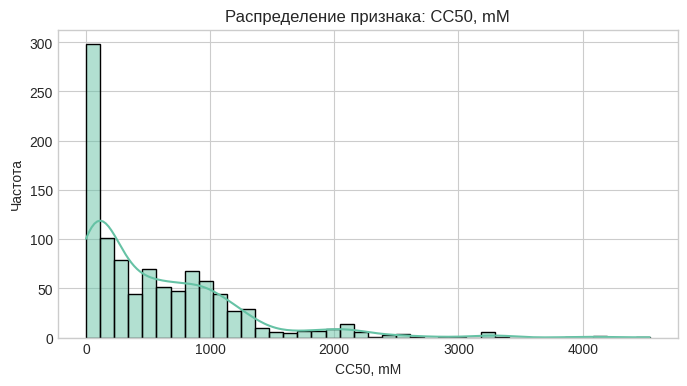

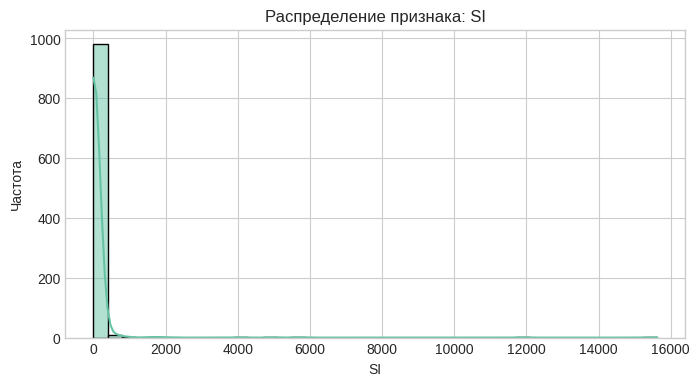

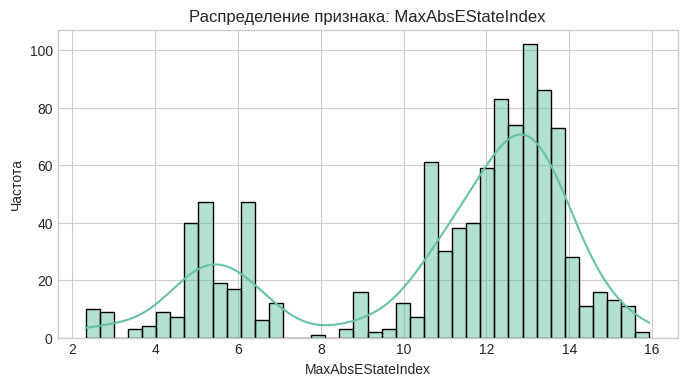

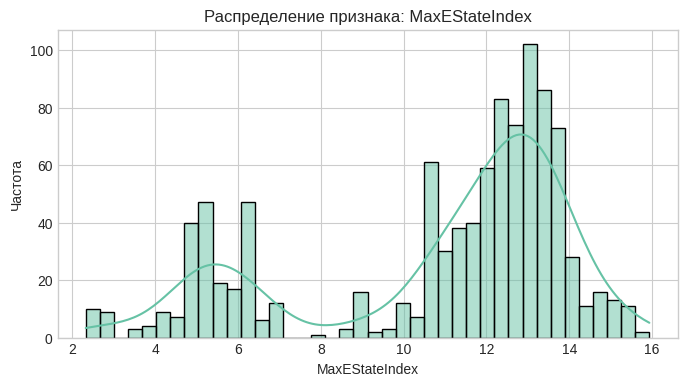

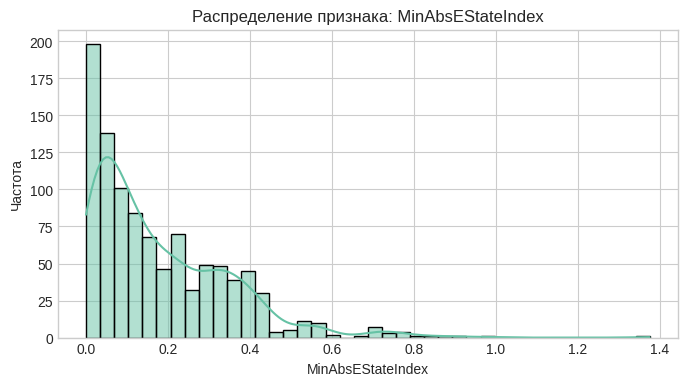

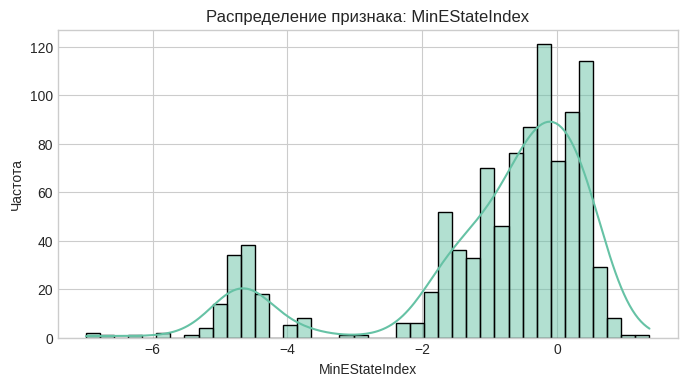

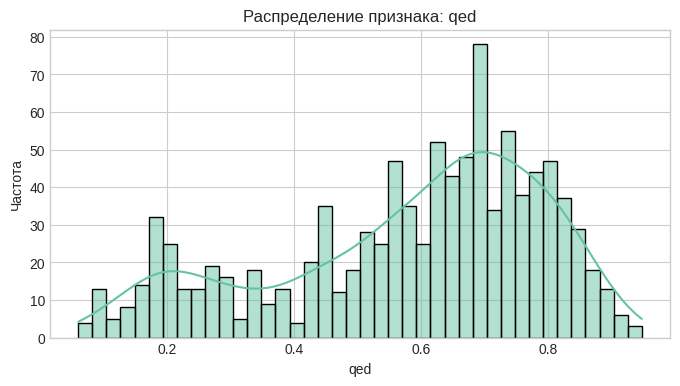

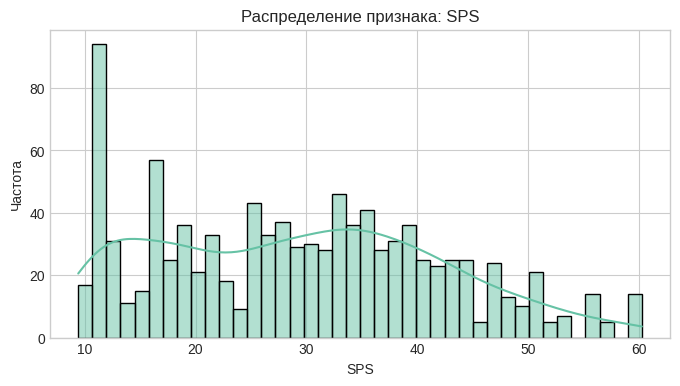

In [ ]:
import seaborn as sns

# Пример: нарисовать распределения первых 10 признаков
for col in df.select_dtypes(include='number').columns[:10]:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(f"Распределение признака: {col}")
    plt.xlabel(col)
    plt.ylabel("Частота")
    plt.grid(True)
    plt.show()

In [ ]:
print(df.columns.tolist())

['Unnamed: 0', 'IC50, mM', 'CC50, mM', 'SI', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8',

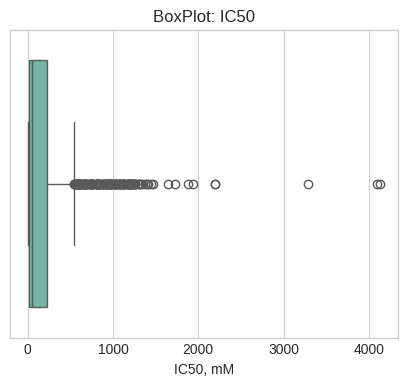

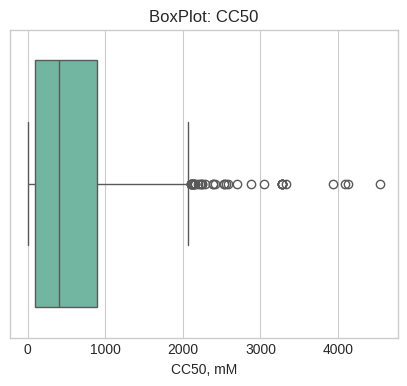

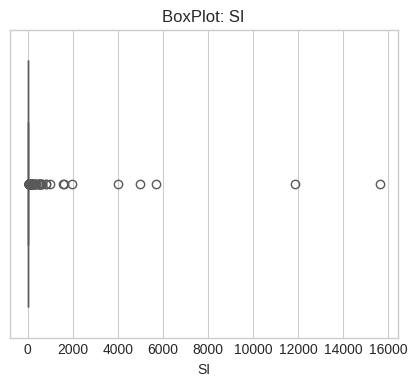

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# BoxPlot для IC50
plt.figure(figsize=(5, 4))
sns.boxplot(x=df["IC50, mM"])
plt.title("BoxPlot: IC50")
plt.show()

# BoxPlot для CC50
plt.figure(figsize=(5, 4))
sns.boxplot(x=df["CC50, mM"])
plt.title("BoxPlot: CC50")
plt.show()

# BoxPlot для SI
plt.figure(figsize=(5, 4))
sns.boxplot(x=df["SI"])
plt.title("BoxPlot: SI")
plt.show()


Сделаем Корреляционный анализ для всего датасета и для интересующих нас признаков

**IC50**

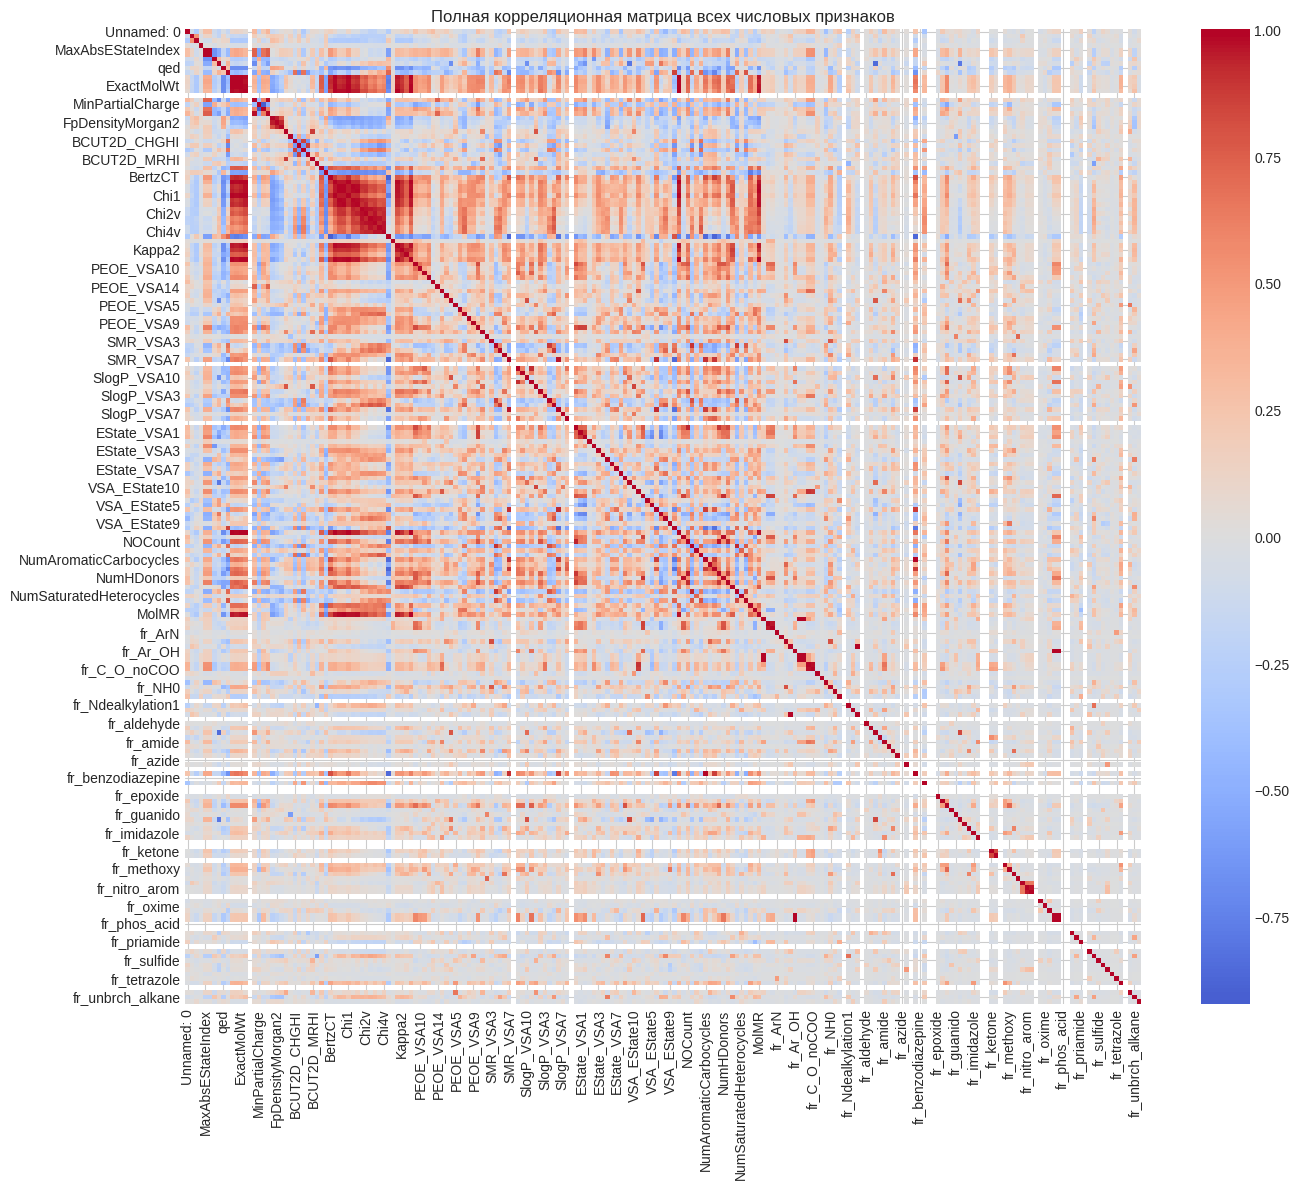

/tmp/ipython-input-14-1726076512.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, ax=axes[i], palette="viridis")
/tmp/ipython-input-14-1726076512.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, ax=axes[i], palette="viridis")
/tmp/ipython-input-14-1726076512.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, ax=axes[i], palette="viridis")


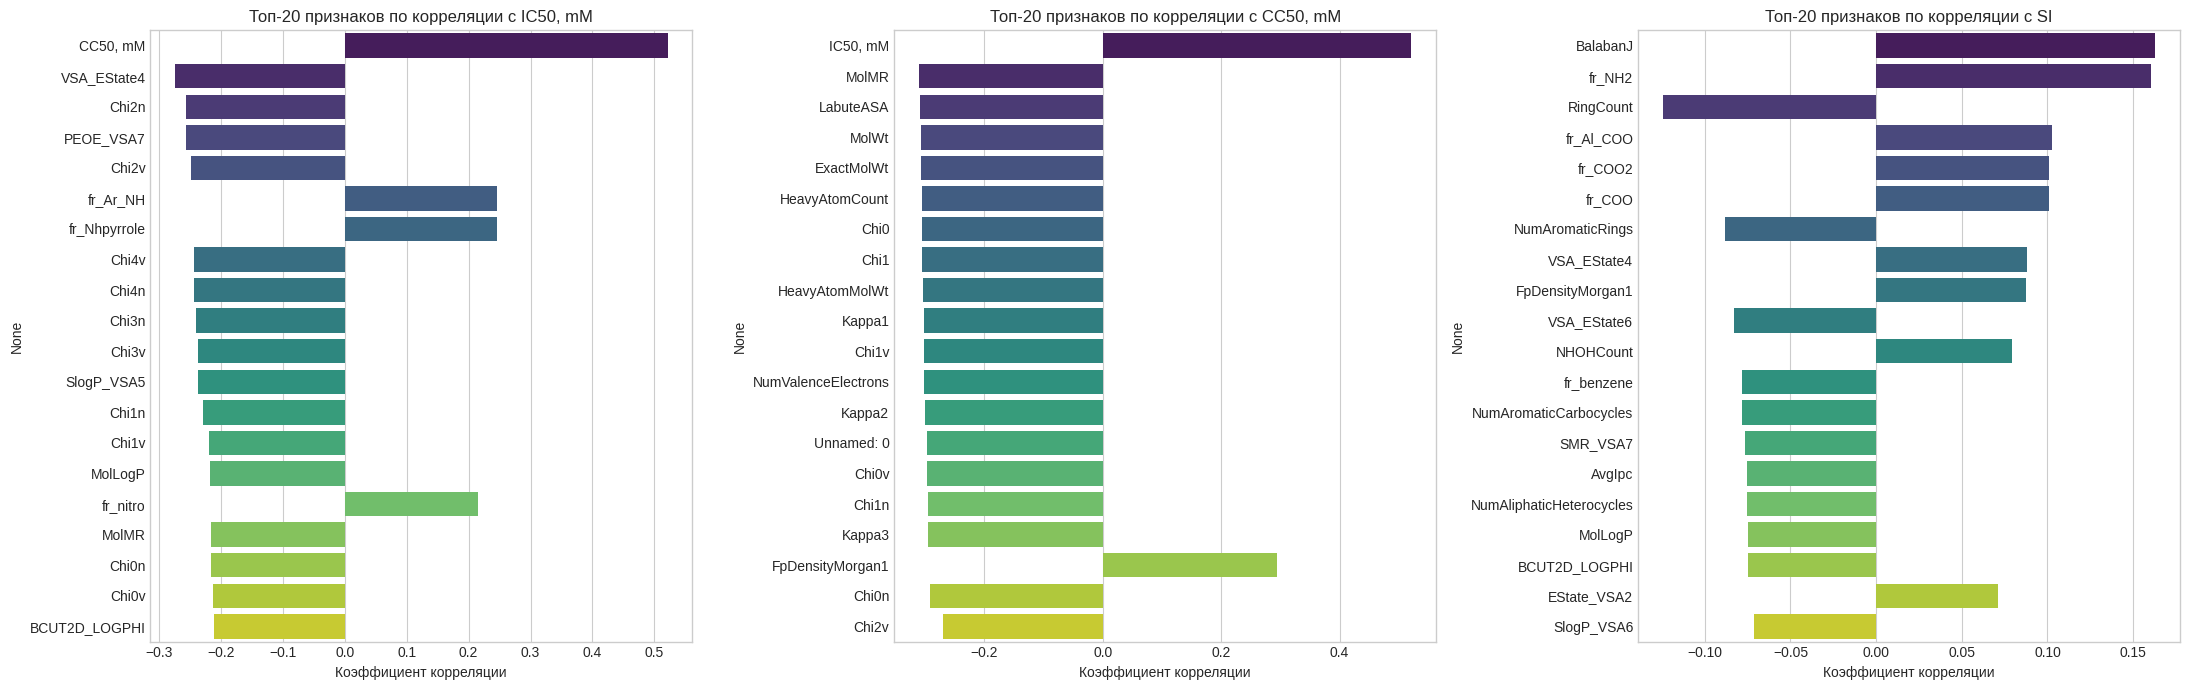

In [ ]:
# Построим визуализацию: 1. Полная корреляционная матрица, 2. Топ-20 признаков по модулю корреляции для IC50, CC50, SI

# Фильтруем только числовые признаки
numeric_df = df.select_dtypes(include='number')

# --- 1. Полная корреляционная матрица ---
plt.figure(figsize=(14, 12))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Полная корреляционная матрица всех числовых признаков")
plt.tight_layout()
plt.show()

# --- 2. Отдельные корреляции с IC50, CC50, SI ---
targets = ['IC50, mM', 'CC50, mM', 'SI']
fig, axes = plt.subplots(1, 3, figsize=(22, 7))

for i, target in enumerate(targets):
    top_corr = numeric_df.corr()[target].drop(target).sort_values(key=abs, ascending=False).head(20)
    sns.barplot(x=top_corr.values, y=top_corr.index, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Топ-20 признаков по корреляции с {target}")
    axes[i].set_xlabel("Коэффициент корреляции")

plt.tight_layout()
plt.show()

In [ ]:


# Все целевые признаки
targets = ['IC50, mM', 'CC50, mM', 'SI']

# Словарь с датасетами: ключ — имя признака, значение — соответствующий датафрейм
datasets_by_target = {
    target: df[[target] + [col for col in df.columns if col not in targets]]
    for target in targets
}

# Примеры использования:
dataset_for_IC50 = datasets_by_target['IC50, mM']
dataset_for_CC50 = datasets_by_target['CC50, mM']
dataset_for_SI   = datasets_by_target['SI']

# Посмотрим пример
dataset_for_IC50.head()

,"IC50, mM",Unnamed: 0,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,0,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,340.300,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,1,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,340.300,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,2,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,388.344,...,0,0,0,0,0,0,0,0,3,0
3,1.705624,3,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,352.311,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,4,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,424.377,...,0,0,0,0,0,0,0,0,0,0


datasets_by_target = {
    target: df[[target] + [col for col in df.columns if col not in targets]]
    for target in targets
}

Данная строка - перебирает все три целевых признака (IC50, mM, CC50, mM, SI)
для каждого создаёт отдельный датафрейм

Сохраняет его в словарь datasets_by_target, где ключ — это название признака, а значение — датафрейм

In [ ]:
# Посмотреть размерности всех трёх поднаборов
for name, df_sub in datasets_by_target.items():
    print(f"{name} → {df_sub.shape}")

IC50, mM → (1001, 212)
CC50, mM → (1001, 212)
SI → (1001, 212)


* В данных нет пропущенных значений в целевых признаках
* Все фичи одинаковые — значит, можно переиспользовать пайплайн

Для всех трёх задач (IC50, CC50, SI) были выделены поднаборы данных одинаковой размерности: 1001 строка, 211 признаков + 1 целевой столбец. Это позволит использовать единый пайплайн предобработки и модели без необходимости повторной фильтрации.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def bar_distribution_binned(df, column, bin_size=10):
    """
    Строит сгруппированную столбчатую диаграмму для указанного признака.

    Параметры:
    - df: датафрейм с данными
    - column: имя признака (string)
    - bin_size: ширина бина для группировки значений
    """
    binned = (df[column] // bin_size) * bin_size
    counts = binned.value_counts().sort_index()

    plt.figure(figsize=(14, 5))
    counts.plot(kind='bar', color='dimgray', edgecolor='black')
    plt.title(f"Столбчатая диаграмма (бинами по {bin_size}) для {column}", fontsize=13)
    plt.xlabel(f"{column}, сгруппировано по {bin_size}", fontsize=11)
    plt.ylabel("Частота", fontsize=11)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


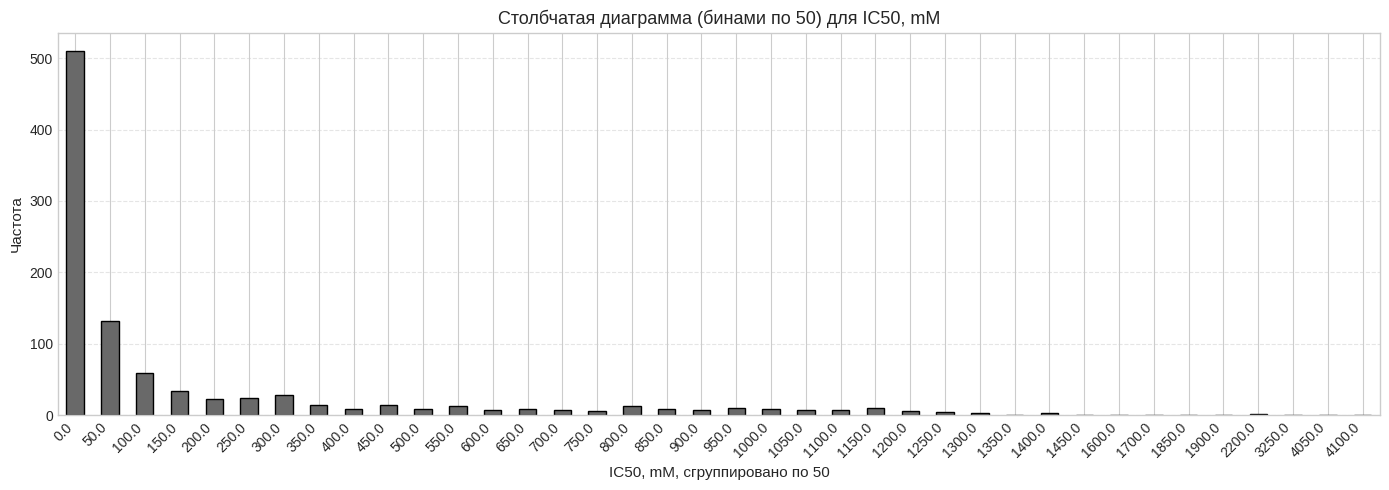

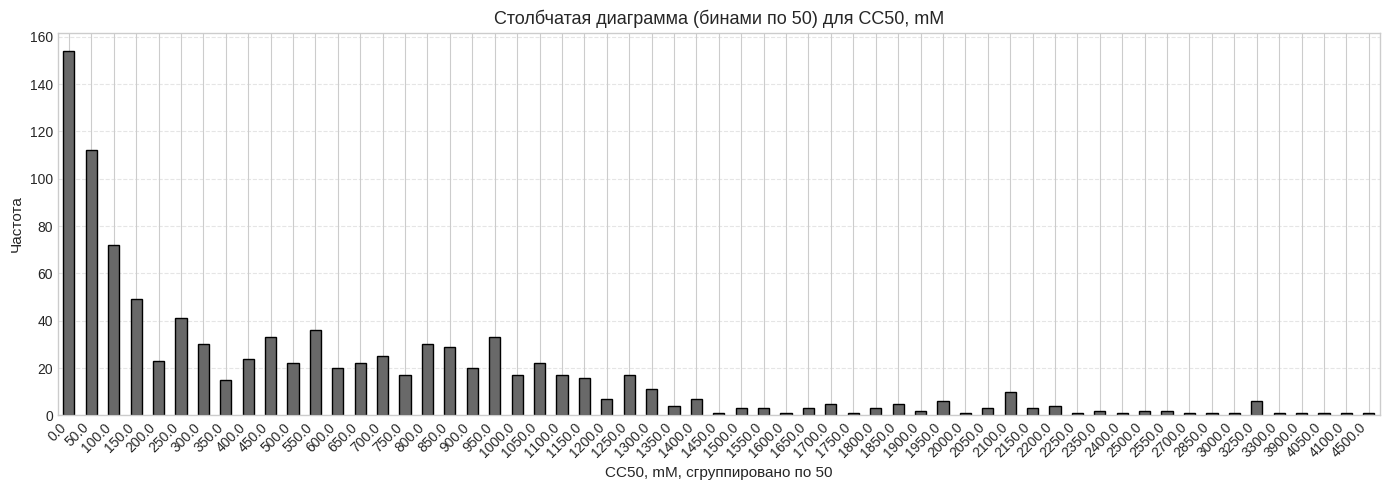

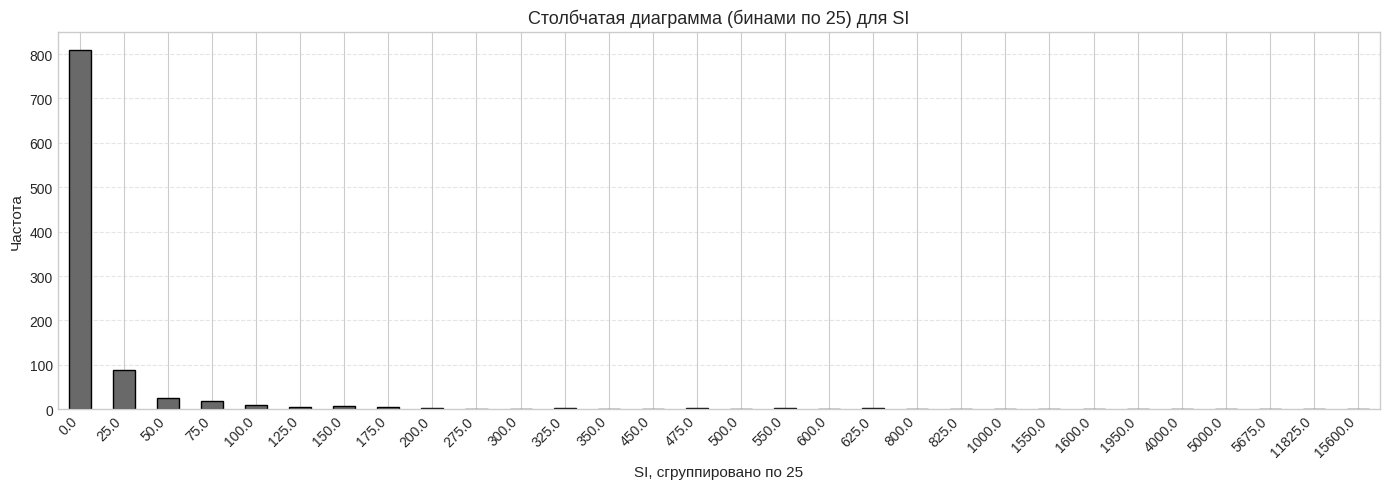

In [ ]:
# IC50
bar_distribution_binned(dataset_for_IC50, 'IC50, mM', bin_size=50)

# CC50
bar_distribution_binned(dataset_for_CC50, 'CC50, mM', bin_size=50)

# SI (лучше выбрать бин 25, чтобы не потерять важные различия)
bar_distribution_binned(dataset_for_SI, 'SI', bin_size=25)

Для анализа каждого из целевых признаков (IC50, CC50, SI) мы использовали две взаимодополняющие формы визуализации:

**Гистограмма распределения с помощью seaborn.histplot()**

Показывает:

* форму распределения (например, асимметрию),
* плотность значений в непрерывном виде,
* возможную необходимость логарифмического преобразования.

* Подходит для анализа статистических свойств: нормальность, смещённость, наличие пиков и хвостов.
* Сгруппированная столбчатая диаграмма по бинам (bar_distribution_binned)
Показывает:
* Частотное распределение по дискретным диапазонам значений (например, 0–50, 50–100 и т.д.),
* Явные выбросы или перегруппировки в конкретных интервалах.

Что нового дают столбчатые диаграммы (с бинами)
**Чёткие диапазоны значений**
* Вместо «плавного» распределения плотности, мы видим точные интервалы, например:
 * 0–50 мМ — 520 соединений
 * 50–100 мМ — 140 соединений

Это помогает количественно понять, в каких интервалах сосредоточена основная масса данных.

**2. Обнаружение «пиков» в конкретных бинах**
* Если в определённом диапазоне значений наблюдается неожиданно высокий скачок частоты — это может говорить о:
* Артефакте в данных (например, дубли, ошибки округления),
* Особенностях эксперимента (фиксированная шкала измерений),
* Реальной биологической закономерности.

Это видно лучше, чем в sns.histplot, где такие пики могут быть «размыты» из-за KDE.



Признаки с пропущенными значениями:


,0
MaxPartialCharge,3
MinPartialCharge,3
MaxAbsPartialCharge,3
MinAbsPartialCharge,3
BCUT2D_MWHI,3
BCUT2D_MWLOW,3
BCUT2D_CHGHI,3
BCUT2D_CHGLO,3
BCUT2D_LOGPHI,3
BCUT2D_LOGPLOW,3


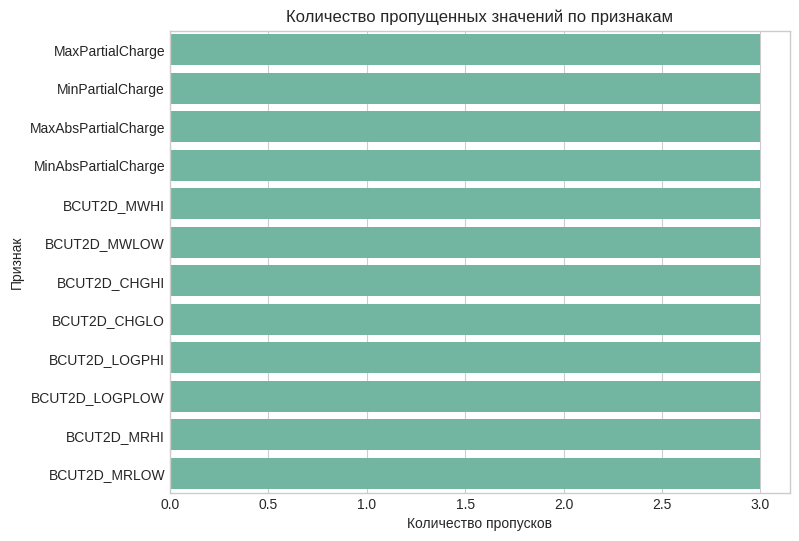

In [ ]:
# === Анализ пропущенных значений ===
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Признаки с пропущенными значениями:")
display(missing)

# Визуализация пропусков
plt.figure(figsize=(8, 6))
sns.barplot(x=missing.values, y=missing.index)
plt.title("Количество пропущенных значений по признакам")
plt.xlabel("Количество пропусков")
plt.ylabel("Признак")
plt.show()

# **Data Engineering**


In [ ]:
import pandas as pd
import numpy as np

# Загрузка данных
df = pd.read_excel("/content/sample_data/1.xlsx")
df = df.drop_duplicates()

# Удаление неинформативных признаков (все значения одинаковы)
n_unique = df.nunique()
constant_features = n_unique[n_unique == 1].index.tolist()
df = df.drop(columns=constant_features)
print(f"Удалено неинформативных признаков: {len(constant_features)}")

# Проверка на отрицательные значения в таргетах
target_cols = ['IC50, mM', 'CC50, mM']
for col in target_cols:
    neg_count = (df[col] < 0).sum()
    print(f"{col}: отрицательных значений — {neg_count}")
    df = df[df[col] >= 0]

# Проверка пропущенных значений
missing = df.isna().sum()
missing_cols = missing[missing > 0].sort_values(ascending=False)
print("Признаки с пропущенными значениями:")
print(missing_cols)

Удалено неинформативных признаков: 18
IC50, mM: отрицательных значений — 0
CC50, mM: отрицательных значений — 0
Признаки с пропущенными значениями:
MaxPartialCharge       3
MinPartialCharge       3
MaxAbsPartialCharge    3
MinAbsPartialCharge    3
BCUT2D_MWHI            3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64


In [ ]:
# Заполнение NaN медианой (только числовые признаки)
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print("Все пропуски в числовых признаках заполнены медианой.")

Все пропуски в числовых признаках заполнены медианой.


# **Масштабирование данных** (важно для моделей)
* Многие ML-модели чувствительны к масштабу признаков. Например:
*  **Ridge, Lasso, KNN, SVM** — требуют масштабирования.
*  **RandomForest, XGBoost** — не требуют, но могут выиграть от этого.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Сохраняем копию фрейма
df_scaled = df.copy()

# Масштабируем только числовые признаки (кроме таргетов)
features_to_scale = [col for col in numeric_cols if col not in ['IC50, mM', 'CC50, mM', 'SI']]
scaler = StandardScaler()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

print("Признаки масштабированы.")

Признаки масштабированы.
